**Introduction to convnets**

Fully connected layers connect every neuron in one layer to every neuron in another layer. The main difference between a convolutional layer and a fully connected layer is that spatial structure is preserved. Instead of streching a (32,32,3) image into a one long vector, we're now going to keep the 3D-structure of the image. Our weights are going to be small filters, for example (5,5,3) and we are going to take this filter and slide it over the image spatially and compute dot products at every spatial location. 

Filters always extend the full depth of the input volume. We're going to take this filter and at a given spatial location we're going to do a dot product between this filter and a chunk of a image. Basically we're just going to overlay this filter on top of a spatial location in the image and then do the dot product, the multiplication of each element of that filter with each corresponding element in that spatial location. We're going to start at upper-left hand corner and at every position we're going to do this dot-product and this will produce one value as output for each position. Thus for a (32,32,3) input, we get a (28,28,1) in the activation map. 

What we saw till now is taking one filter and sliding it over all the spatial locations in the image. When we're dealing with convolutional layer, we want to work with multiple filters. For example, if we have 6 (5,5) filters then we'll get 6 separate activation maps. We stack these up to get a "new image" of (28,28,6). In practice, it's actually common to zero pad the borders. The motivation of doing this zero padding and trying to maintain input size is that if you have multiple layers stacked together and if we don't zero padding then we're going to really quickly shrink the size of the outputs that we have. You can imagine if you have a pretty deep network, then very quickly the size of the activation maps is going to shrink. 

Also, we have convolutional layers interspersed with pooling layers once in a while. Pooling layers makes the representations smaller and more manageable. So a pooling layer basically downsamples by taking your input volume, for example (224,224,64) to (112,112,64). For example: We take a 2*2 filter with a stride of 2 and then we're going to slide it along our input volume and just take the maximum value. 

Let’s take a practical look at a simple convnet
example. It uses a convnet to classify MNIST digits, a task which cab also be done using a densely connected network. Even though the convnet will be basic, its accuracy will blow out of the water that of the densely connected model. The following lines of code show you what a basic convnet looks like. It’s a stack of *Conv2D* and *MaxPooling2D* layers. You’ll see in a minute exactly what they do.

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Using TensorFlow backend.


Importantly, a convnet takes as input tensors of shape (*image_height, image_width, image_channels*). In this case, we’ll configure the convnet to process inputs of size *(28, 28, 1)*, which is the format of MNIST images. We’ll do this by passing the argument *input_shape=(28, 28, 1)* to the first layer. 

https://keras.io/layers/convolutional/

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see that the output of every *Conv2D* and *MaxPooling2D* layer is a 3D tensor of shape (*height, width, channels*). The width and height dimensions tend to shrink as you go deeper in the network. The number of channels is controlled by the first argument passed to the Conv2D layers (32 or 64).

The next step is to feed the last output tensor (of shape (3, 3, 64)) into a densely connected classifier network like those you’re already familiar with: a stack of Dense layers. These classifiers process vectors, which are 1D, whereas the current output is a
3D tensor. First we have to flatten the 3D outputs to 1D, and then add a few Dense layers on top.

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We’ll do 10-way classification, using a final layer with 10 outputs and a softmax activation. Here’s what the network looks like now:

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

As you can see, the *(3, 3, 64)* outputs are flattened into vectors of shape *(576,)* before going through two Dense layers.

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 51s 847us/step - loss: 0.1769 - accuracy: 0.9452
Epoch 2/5
60000/60000 [==============================] - 51s 845us/step - loss: 0.0488 - accuracy: 0.9851
Epoch 3/5
60000/60000 [==============================] - 50s 838us/step - loss: 0.0327 - accuracy: 0.9897
Epoch 4/5
60000/60000 [==============================] - 49s 822us/step - loss: 0.0245 - accuracy: 0.9922
Epoch 5/5
60000/60000 [==============================] - 50s 829us/step - loss: 0.0199 - accuracy: 0.9937


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 290us/step


0.9904999732971191

Whereas the densely connected network had a test accuracy of 97.8%, the basic convnet has a test accuracy of 99.3%: we decreased the error rate by 68%
(relative). Not bad! But why does this simple convnet work so well, compared to a densely connected
model? To answer this, let’s dive into what the Conv2D and MaxPooling2D layers do.

**The convolution operation**

The fundamental difference between a densely connected layer and a convolution layer is this: Dense layers learn global patterns in their input feature space, whereas convolution layers learn
local patterns: in the case of images, patterns found in small 2D windows of the inputs. In the previous example, these windows were all 3 × 3.

Convnet's can learn spatial hierarchies of patterns. A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on. This allows convnets to efficiently learn increasingly complex and abstract visual concepts (because the visual world is fundamentally spatially hierarchical).

Convolutions operate over 3D tensors, called *feature maps*, with two spatial axes (*height* and *width*) as well as a *depth* axis (also called the *channels* axis). For an RGB image, the dimension of the depth axis is 3, because the image has three color channels: red, green, and blue. For a black-and-white picture, like the MNIST digits, the depth is 1
(levels of gray). In the MNIST example, the first convolution layer takes a feature map of size (28, 28, 1) and outputs a feature map of size (26, 26, 32): it computes 32 filters over its input. Convolutions are defined by two key parameters:

* Size of the patches extracted from the inputs—These are typically 3 × 3 or 5 × 5. In the example, they were 3 × 3, which is a common choice.

* Depth of the output feature map—The number of filters computed by the convolution. The example started with a depth of 32 and ended with a depth of 64.

**UNDERSTANDING PADDING**

Consider a 5 × 5 feature map (25 tiles total). There are only 9 tiles around which you can center a 3 × 3 window, forming a 3 × 3 grid. Hence, the output feature map will be 3 × 3. It shrinks a little: by exactly two tiles alongside each dimension, in this case. You can see this border effect in action in the earlier example: you start with 28 × 28 inputs, which become 26 × 26 after the first convolution layer.

If you want to get an output feature map with the same spatial dimensions as the input, you can use padding. Padding consists of adding an appropriate number of rows and columns on each side of the input feature map so as to make it possible to fit center
convolution windows around every input tile. For a 3 × 3 window, you add one column on the right, one column on the left, one row at the top, and one row at the bottom. For a 5 × 5 window, you add two rows.

***In Conv2D layers, padding is configurable via the padding argument, which takes two values: "valid", which means no padding (only valid window locations will be used); and "same", which means “pad in such a way as to have an output with the same width and height as the input.” The padding argument defaults to "valid".***

**UNDERSTANDING CONVOLUTION STRIDES**

The other factor that can influence output size is the notion of *strides*. The default value of *stride* is 1 but it’s possible to have convolutions with a stride higher than 1. Using stride 2 means the width and height of the feature map are downsampled by a factor of 2

**UNDERSTANDING MAX-POOLING**

In the convnet example, you may have noticed that the size of the feature maps is halved after every MaxPooling2D layer. For instance, before the first MaxPooling2D layers, the feature map is 26×26, but the max-pooling operation halves it to 13×13.
 ***That’s the role of max pooling: to aggressively downsample feature maps, much like
strided convolutions.***

**Training a convnet from scratch on a small dataset**

Having to train an image-classification model using very little data is a common situation, which you’ll likely encounter in practice if you ever do computer vision in a professional context. A “few” samples can mean anywhere from a few hundred to a few tens of thousands of images. As a practical example, we’ll focus on classifying images as dogs or cats, in a dataset containing 4,000 pictures of cats and dogs (2,000 cats, 2,000 dogs). We’ll use 2,000 pictures for training—1,000 for validation, and 1,000 for testing.

***We’ll start by naively training a small convnet on the 2,000 training samples, without any regularization, to set a baseline for what can be achieved. This will get you to a classification accuracy of 71%. At that point, the main issue will be overfitting. Then we’ll introduce data augmentation, a powerful technique for mitigating overfitting in computer vision. By using data augmentation, you’ll improve the network to reach an accuracy of 82%.***

In the next section, we’ll review two more essential techniques for applying deep learning to small datasets: **feature extraction with a pretrained network** (which will get you to an accuracy of 90% to 96%) and **fine-tuning a pretrained network** (this will get you to a final accuracy of 97%). Together, these three strategies— **1)** data augumentation, **2)** doing feature extraction using a pretrained model, and **3)** fine-tuning a pretrained model—will constitute your future toolbox for tackling the problem of performing image classification with small datasets.




**Dogs vs. Cats dataset**

This dataset contains 25,000 images of dogs and cats (12,500 from each class). After downloading and uncompressing it, you’ll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

You built a small convnet for MNIST in the previous example, so you should be familiar with such convnets. You’ll reuse the same general structure: the convnet will be a stack of alternated *Conv2D* (with relu activation) and *MaxPooling2D* layers.
But because you’re dealing with bigger images and a more complex problem, you’ll make your network larger, accordingly: it will have one more *Conv2D + MaxPooling2D* stage. This serves both to augment the capacity of the network and to further reduce
the size of the feature maps so they aren’t overly large when you reach the Flatten layer. Here, because you start from inputs of size 150 × 150 (a somewhat arbitrary choice), you end up with feature maps of size 7 × 7 just before the Flatten layer.

In [0]:
# Instantiating a small convnet for dogs vs. cats classification
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [0]:
# Configuring the model for training
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

**Data preprocessing**

As you know by now, data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:

1 Read the picture files.

2 Decode the JPEG content to RGB grids of pixels.

3 Convert these into floating-point tensors.

4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

***It may seem a bit daunting, but fortunately Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator, which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.***

**Data Storing Architecture**

Download the train dataset and test dataset, extract them into 2 different folders named as “train” and “test”. The train folder should contain ‘n’ folders each containing images of respective classes. For example, In the Dog vs Cats data set, the train folder should have 2 folders, namely “Dog” and “Cats” containing respective images inside them.

Create a validation set, often you have to manually create a validation data by sampling images from the train folder (you can either sample randomly or in the order your problem needs the data to be fed) and moving them to a new folder named “valid”. If the validation set is already provided, you could use them instead of creating them manually.

Here are the most used attributes along with the flow_from_directory() method.

* The **directory** must be set to the path where your ‘n’ classes of folders are present.
* The **target_size** is the size of your input images, every image will be resized to this size.
* **color_mode**: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.
* **batch_size**: No. of images to be yielded from the generator per batch.
* **class_mode**: Set “binary” if you have only two classes to predict, if not set to “categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.
* **shuffle**: Set True if you want to shuffle the order of the image that is being yielded, else set False.
* **seed**: Random seed for applying random image augmentation and shuffling the order of the image.


**Links to understand ImageDataGenerator class in depth:**

https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/

https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

https://keras.io/preprocessing/image/


In [0]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
# Using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/gdrive/My Drive/CSCE636 Neural Networks/cats_and_dogs_small/train'
train_generator = train_datagen.flow_from_directory(train_dir, # Target directory
                                                    target_size=(150, 150), # Resizes all images to 150 × 150
                                                    batch_size=20,
                                                    class_mode='binary')

validation_dir = '/content/gdrive/My Drive/CSCE636 Neural Networks/cats_and_dogs_small/validation'
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Understanding Python generators**
A Python generator is an object that acts as an iterator: it’s an object you can use with the for … in operator. Generators are built using the yield operator.

Here is an example of a generator that yields integers:

```
def generator():
  i = 0
  while True:
    i += 1
    yield i

for item in generator():
  print(item)
  if item > 4:
    break
```

Let’s look at the output of one of these generators: it yields batches of 150 × 150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). There are 20 samples in each batch (the batch size). Note that the generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, you need to *break* the iteration loop at some point:

In [0]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let’s fit the model to the data using the generator. You do so using the *fit_generator* method, the equivalent of *fit* for data generators like this one. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the *steps_per_epoch* argument: after having drawn *steps_per_epoch* batches from the generator—that is, after having run for *steps_per_epoch* gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using *fit_generator*, you can pass a *validation_data* argument, much as
with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [0]:
# Fitting the model using a batch generator
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 934s 9s/step - loss: 0.6914 - acc: 0.5395 - val_loss: 0.6871 - val_acc: 0.6020
Epoch 2/30
100/100 [==============================] - 111s 1s/step - loss: 0.6561 - acc: 0.6120 - val_loss: 0.5989 - val_acc: 0.6050
Epoch 3/30
100/100 [==============================] - 106s 1s/step - loss: 0.6077 - acc: 0.6745 - val_loss: 0.6258 - val_acc: 0.6730
Epoch 4/30
100/100 [==============================] - 107s 1s/step - loss: 0.5631 - acc: 0.7095 - val_loss: 0.6349 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 107s 1s/step - loss: 0.5407 - acc: 0.7230 - val_loss: 0.8301 - val_acc: 0.6580
Epoch 6/30
100/100 [==============================] - 108s 1s/step - loss: 0.5170 - acc: 0.7460 - val_loss: 0.4445 - val_acc: 0.7050
Epoch 7/30
100/100 [==============================] - 107s 1s/step - loss: 0.4914 - acc: 0.7560 - val_loss: 0.7902 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 112s 1s/step - 

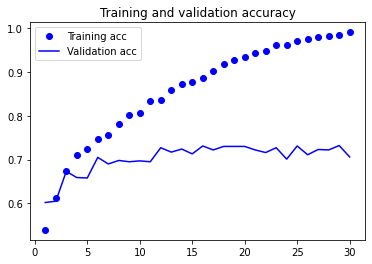

In [0]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.

Because you have relatively few training samples (2,000), overfitting will be your
number-one concern. You already know about a number of techniques that can help
mitigate overfitting, such as dropout and weight decay (L2 regularization). We’re now
going to work with a new one, specific to computer vision and used almost universally
when processing images with deep-learning models: *data augmentation*.

**Using data augmentation**

Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data. **Data augmentation takes the approach of generating more training data
from existing training samples, by *augmenting* the samples via a number of random transformations that yield believable-looking images.** The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the *ImageDataGenerator* instance. Let’s get
started with an example.

In [0]:
# Setting up a data augmentation configuration via ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation). Let’s quickly go over this code:

* ***rotation_range*** is a value in degrees (0–180), a range within which to randomly rotate pictures.

* ***width_shift*** and *height_shift* are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.

* ***shear_range*** is for randomly applying shearing transformations.

* ***zoom_range*** is for randomly zooming inside pictures.

* ***horizontal_flip*** is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example,
real-world pictures).

* ***fill_mode*** is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

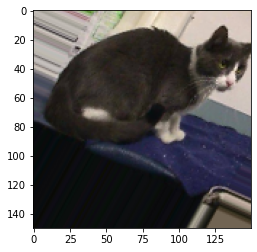

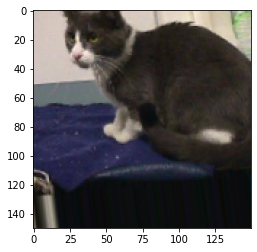

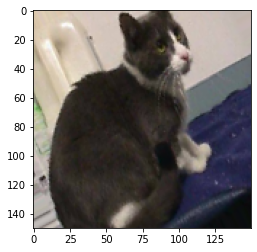

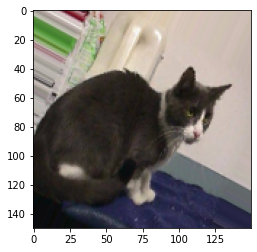

In [0]:
# Displaying some randomly augmented training images
from keras.preprocessing import image
import os

train_cats_dir = os.path.join(train_dir, 'cats')
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

***If you train a new network using this data-augmentation configuration, the network will never see the same input twice. But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images—you can’t produce new information, you can only remix existing information. As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, you’ll also add a Dropout layer to your model, right before the densely connected classifier.***

In [0]:
#Defining a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/gdrive/My Drive/CSCE636 Neural Networks/cats_and_dogs_small/train'
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_dir = '/content/gdrive/My Drive/CSCE636 Neural Networks/cats_and_dogs_small/validation'
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 186s 2s/step - loss: 0.6916 - acc: 0.5253 - val_loss: 0.6807 - val_acc: 0.5825
Epoch 2/100
100/100 [==============================] - 179s 2s/step - loss: 0.6755 - acc: 0.5747 - val_loss: 0.6331 - val_acc: 0.5780
Epoch 3/100
100/100 [==============================] - 179s 2s/step - loss: 0.6609 - acc: 0.5893 - val_loss: 0.6665 - val_acc: 0.5730
Epoch 4/100
100/100 [==============================] - 179s 2s/step - loss: 0.6474 - acc: 0.6117 - val_loss: 0.6132 - val_acc: 0.6405
Epoch 5/100
100/100 [==============================] - 185s 2s/step - loss: 0.6233 - acc: 0.6501 - val_loss: 0.6000 - val_acc: 0.6650
Epoch 6/100
100/100 [==============================] - 182s 2s/step - loss: 0.6127 - acc: 0.6626 - val_loss: 0.5992 - val_acc: 0.6630
Epoch 7/100
100/100 [==============================] - 180s 2s/step - loss: 0.6026 - acc: 0.6715 - val_loss: 0.5

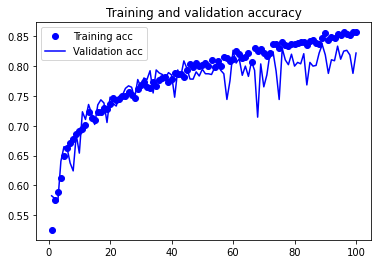

In [0]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

By using regularization techniques even further, and by tuning the network’s parameters (such as the number of filters per convolution layer, or the number of layers in
the network), you may be able to get an even better accuracy, likely up to 86% or 87%.
But it would prove difficult to go any higher just by training your own convnet from
scratch, because you have so little data to work with. As a next step to improve your
accuracy on this problem, you’ll have to use a pretrained model, which is the focus of
the next two sections.

**Using a pretrained convnet**

***A common and highly effective approach to deep learning on small image datasets is
to use a pretrained network.*** A *pretrained network* is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. If this
original dataset is large enough and general enough, then the spatial hierarchy of features learned by the pretrained network can effectively act as a generic model of the visual world, and hence its features can prove useful for many different computer vision problems, even though these new problems may involve completely different classes than those of the original task. ***For instance, you might train a network on ImageNet (where classes are mostly animals and everyday objects) and then repurpose this trained network for something as remote as identifying furniture items in images.*** Such portability of learned features across different problems is a key advantage of deep learning compared to many older, shallow-learning approaches, and it makes deep learning very effective for small-data problems.

In this case, let’s consider a large convnet trained on the ImageNet dataset
(1.4 million labeled images and 1,000 different classes). ImageNet contains many animal classes, including different species of cats and dogs, and you can thus expect to perform well on the dogs-versus-cats classification problem.

You’ll use the VGG16 architecture, developed by Karen Simonyan and Andrew
Zisserman in 2014; it’s a simple and widely used convnet architecture for ImageNet. Although it’s an older model, far from the current state of the art and somewhat heavier than many other recent models, I chose it because its architecture is similar to what you’re already familiar with and is easy to understand without introducing any
new concepts. This may be your first encounter with one of these cutesy model
names—VGG, ResNet, Inception, Inception-ResNet, Xception, and so on; you’ll get used to them, because they will come up frequently if you keep doing deep learning for computer vision. There are two ways to use a pretrained network: *feature extraction* and *fine-tuning*.
We’ll cover both of them. Let’s start with feature extraction.

**Feature extraction**

As you saw previously, convnets used for image classification comprise two parts:
they start with a series of pooling and convolution layers, and they end with a densely connected classifier. The first part is called the ***convolutional base*** of the model. ***In the case of convnets, feature extraction consists of taking the convolutional base of a previously trained network, running the new data through it, and training a new classifier on top of the output.***

Why only reuse the convolutional base? Could you reuse the densely connected classifier as well? In general, doing so should be avoided. ***The reason is that the representations learned by the convolutional base are likely to be more generic and therefore more reusable. But the representations learned by the classifier will necessarily be specific to the set of classes on which the model was trained—they will only contain information about the presence probability of this or that class in the entire picture***. Additionally, representations found in densely connected layers no longer contain any information about where objects are located in the input image: these layers get rid of the notion of space, whereas the object location is still described by convolutional feature maps. For problems
where object location matters, densely connected features are largely useless.

***Layers that come earlier in the model extract local, highly generic feature
maps (such as visual edges, colors, and textures), whereas layers that are higher up extract more-abstract concepts (such as “cat ear” or “dog eye”). So if your new dataset differs a lot from the dataset on which the original model was trained, you may be better off using only the first few layers of the model to do feature extraction, rather than using the entire convolutional base.***

***In this case, because the ImageNet class set contains multiple dog and cat classes,
it’s likely to be beneficial to reuse the information contained in the densely connected
layers of the original model. But we’ll choose not to, in order to cover the more general
case where the class set of the new problem doesn’t overlap the class set of the
original model. Let’s put this in practice by using the convolutional base of the VGG16
network, trained on ImageNet, to extract interesting features from cat and dog
images, and then train a dogs-versus-cats classifier on top of these features.***

The VGG16 model, among others, comes prepackaged with Keras. You can import
it from the *keras.applications* module. Here’s the list of image-classification
models (all pretrained on the ImageNet dataset) that are available as part of *keras
.applications*:

* Xception
* Inception V3
* ResNet50
* VGG16
* VGG19
* MobileNet

In [0]:
# Instantiating the VGG16 convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 0s 0us/step


https://keras.io/applications/#vgg16

You pass three arguments to the constructor:

* ***weights***: one of *None* (random initialization) or *'imagenet'* (pre-training on ImageNet).

* ***include_top***: whether to include (or not) the 3 fully-connected layers at the top of the network. By default, this densely connected classifier corresponds to the 1,000 classes from ImageNet. Because you intend to use your own densely connected classifier (with only two classes: cat and dog), you don’t need to include it.

* ***input_shape*** is the shape of the image tensors that you’ll feed to the network.

Here’s the detail of the architecture of the VGG16 convolutional base. It’s similar to the simple convnets you’re already familiar with:

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

The final feature map has shape (4, 4, 512). That’s the feature on top of which you’ll stick a densely connected classifier.

At this point, there are two ways you could proceed:

* Running the convolutional base over your dataset, recording its output to a Numpy array on disk, and then using this data as input to a standalone, densely
connected classifier. This solution is fast and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most
expensive part of the pipeline. But for the same reason, this technique won’t allow you to use data augmentation.

* **Extending the model you have (conv_base) by adding Dense layers on top, and running the whole thing end to end on the input data. This will allow you to use data augmentation, because every input image goes through the convolutional base every time it’s seen by the model. But for the same reason, this technique is far more expensive than the first.**

We’ll cover the second techniques. The second technique is much slower and more expensive, but which allows you to use data augmentation during training: extending the *conv_base* model and running it end to end on the inputs.

In [0]:
# Adding a densely connected classifier on top of the convolutional base
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


***As you can see, the convolutional base of VGG16 has 14,714,688 parameters, which is very large. The classifier you’re adding on top has 2 million parameters. Before you compile and train the model, it’s very important to freeze the convolutional base. Freezing a layer or set of layers means preventing their weights from being
updated during training. If you don’t do this, then the representations that were previously learned by the convolutional base will be modified during training. Because the *Dense* layers on top are randomly initialized, very large weight updates would be
propagated through the network, effectively destroying the representations previously learned.***

In Keras, you freeze a network by setting its trainable attribute to False:

In [0]:
print('This is the number of trainable weights ' 'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


**With this setup, only the weights from the two Dense layers that you added will be trained. Note that in order for these changes to take effect, you must first compile the model. If you ever modify weight trainability after compilation, you should then recompile the model, or these changes will be ignored.** Now you can start training your model, with the same data-augmentation configuration that you used in the previous example.

In [0]:
# Training the model end to end with a frozen convolutional base
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/gdrive/My Drive/CSCE636 Neural Networks/cats_and_dogs_small/train'
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_dir = '/content/gdrive/My Drive/CSCE636 Neural Networks/cats_and_dogs_small/validation'
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 683s 7s/step - loss: 0.5977 - acc: 0.6820 - val_loss: 0.4292 - val_acc: 0.8210
Epoch 2/30
100/100 [==============================] - 660s 7s/step - loss: 0.4915 - acc: 0.7790 - val_loss: 0.3482 - val_acc: 0.8650
Epoch 3/30
100/100 [==============================] - 660s 7s/step - loss: 0.4406 - acc: 0.8150 - val_loss: 0.3719 - val_acc: 0.8720
Epoch 4/30
100/100 [==============================] - 665s 7s/step - loss: 0.4030 - acc: 0.8250 - val_loss: 0.2637 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 675s 7s/step - loss: 0.3876 - acc: 0.8285 - val_loss: 0.2619 - val_acc: 0.8830
Epoch 6/30
100/100 [==============================] - 670s 7s/step - loss: 0.3737 - acc: 0.8360 - val_loss: 0.6113 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 661s 7s/step - loss: 0.3589 - acc: 0.8420 - val_loss: 0.3019 - v

Let’s plot the results again. As you can see, you reach a validation accuracy of about 96%. This is much better than you achieved with the small convnet trained from scratch.

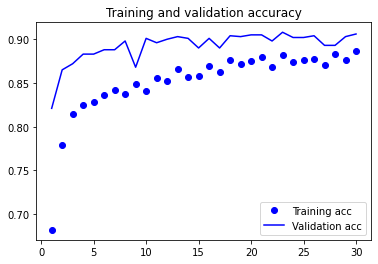

In [0]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

**Fine-tuning**

Another widely used technique for model reuse, complementary to feature extraction, is *fine-tuning*. Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in this case, the fully connected classifier) and these top layers. This is called fine-tuning because it slightly adjusts the more
abstract representations of the model being reused, in order to make them more relevant for the problem at hand.

I stated earlier that it’s necessary to freeze the convolution base of VGG16 in order to be able to train a randomly initialized classifier on top. For the same reason, it’s only possible to fine-tune the top layers of the convolutional base once the classifier on top
has already been trained. If the classifier isn’t already trained, then the error signal propagating through the network during training will be too large, and the representations previously learned by the layers being fine-tuned will be destroyed. Thus the steps for fine-tuning a network are as follow:

1 Add your custom network on top of an already-trained base network.

2 Freeze the base network.

3 Train the part you added.

4 Unfreeze some layers in the base network.

5 Jointly train both these layers and the part you added.

You already completed the first three steps when doing feature extraction. Let’s proceed with step 4: you’ll unfreeze your conv_base and then freeze individual layers
inside it. You’ll fine-tune the last three convolutional layers, which means all layers up to *block4_pool* should be frozen, and the layers *block5_conv1*, *block5_conv2*, and *block5_conv3* should be trainable. 

In [0]:
# Freezing all layers up to a specific one
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

Now you can begin fine-tuning the network. You’ll do this with the RMSProp optimizer, using a very low learning rate. The reason for using a low learning rate is that
you want to limit the magnitude of the modifications you make to the representations of the three layers you’re fine-tuning. Updates that are too large may harm these representations.

In [0]:
# Fine-tuning the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

In [0]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()